In [70]:
 import pandas as pd
import requests
import json
import logging

# Configure logging
logging.basicConfig(filename='Question_8_log.txt', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Requesting content from the API
response = requests.get('https://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data
    json_data = response.json()

    # Save the JSON data to a file
    with open('json_data.json', 'w') as json_file:
        json.dump(json_data, json_file)
        logging.info("JSON data has been saved successfully.")
else:
    logging.error("Error occurred while requesting the data.")

# Load JSON data
with open('json_data.json', 'r') as json_file:
    data = json.load(json_file)

# Extract relevant attributes and store in a list of dictionaries
records = []
for item in data["_embedded"]["episodes"]:
    record = {
        'id': item['id'],
        'url': item['url'],
        'name': item['name'],
        'season': item['season'],
        'number': item['number'],
        'type': item['type'],
        'airdate': item['airdate'],
        'airtime': item['airtime'],
        'runtime': item['runtime'],
        'average_rating': item['rating']['average'],
        'summary': item['summary'].replace('<p>', '').replace('</p>', ''),
        'medium_image_link': item['image']['medium'],
        'original_image_link': item['image']['original']
    }
    records.append(record)

# Convert the list of dictionaries to a DataFrame
structured_dataset = pd.DataFrame(records)
structured_dataset.airdate = structured_dataset.airdate.apply(pd.to_datetime)
# Save the DataFrame as an Excel file
structured_dataset.to_excel('structured_dataset.xlsx', index=False)


In [71]:
df=structured_dataset.copy()

   Season  season_avg_rating
0       1             8.0900
1       2             8.0000
2       3             7.7750
3       4             7.5375


<Axes: xlabel='Season'>

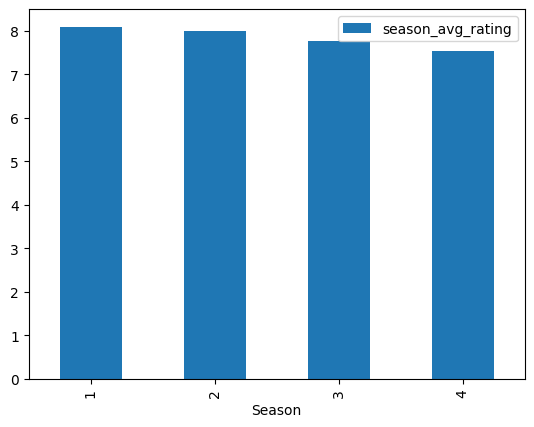

In [74]:
#Get all the overall ratings for each season and using plots compare the ratings for all the
#seasons, like season 1 ratings, season 2, and so on.

season_avg_rating=[]
for s_num in df.season.unique():
    season_avg_rating.append(df[df['season']==s_num]['average_rating'].mean())

season_rating_df=pd.DataFrame({'Season':df.season.unique(),
                               'season_avg_rating':season_avg_rating})

print(season_rating_df)
season_rating_df.plot(kind='bar',x='Season')

In [64]:
#Get all the episode names, whose average rating is more than 8 for every season
df[df['average_rating']>8][['season','name']]

,season,name
6,1,Trompe L'Oeil
8,1,The Well-Tempered Clavier
9,1,The Bicameral Mind
17,2,Kiksuya
18,2,Vanishing Point
19,2,The Passenger


In [87]:
#Get all the episode names that aired before May 2019
df[df.airdate<'2019-05-01 00:00:00']['name'].values

array(['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory',
       'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay',
       'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Journey Into Night', 'Reunion', 'Virtù e Fortuna',
       'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space',
       'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger'],
      dtype=object)

In [99]:
#Get the episode name from each season with the highest and lowest rating
data={}
for s_num in df.season.unique():
    extreme_episodes=[df[df['season']==s_num][['name','average_rating']].max()[0],
                    df[df['season']==s_num][['name','average_rating']].min()[0]]
    data[f'Season {s_num}']=extreme_episodes

extreme_episodes_df=pd.DataFrame(data)
extreme_episodes_df

In [115]:
#Get the summary for the most popular ( ratings ) episode in every season

for s in extreme_episodes_df.columns:
    ep_name= extreme_episodes_df[s][0]
    ep_summary=df[df['name']==ep_name]['summary'].values
    print(f'''
    {s}
    
    Episode name: {ep_name}
    
    Summary: 
    {ep_summary}
    ''')


    Season 1
    
    Episode name: Trompe L'Oeil
    
    Summary: 
    ['While William and Dolores travel to the unclaimed territories, Charlotte and Theresa make plans to force Robert out of the park using Clementine. Meanwhile, Maeve continues her plans to escape Westworld.']
    

    Season 2
    
    Episode name: Virtù e Fortuna
    
    Summary: 
    ['While Delores makes a deal with the Confederados, Maeve and her group find Felix and Sylvester. Meanwhile, a new Guest comes to Westworld, and Bernard has a meeting of minds with Peter.']
    

    Season 3
    
    Episode name: The Winter Line
    
    Summary: 
    ['People put up a lot of walls. Bring a sledgehammer to your life.']
    

    Season 4
    
    Episode name: Zhuangzi
    
    Summary: 
    ['God is bored.']
    
